In [1]:
import tensorflow as tf


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
#importing mnist digits gray scale pics dataset

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

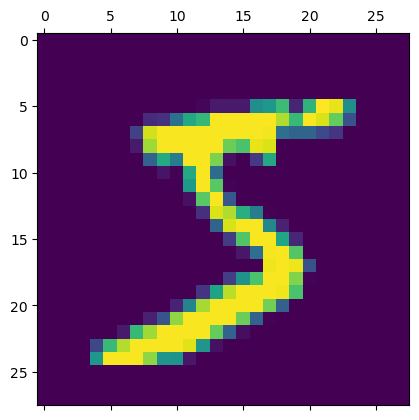

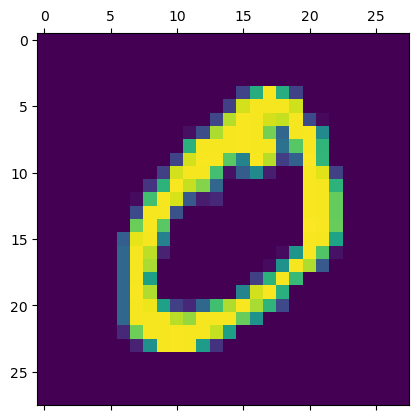

In [7]:
plt.matshow(X_train[0])
plt.matshow(X_train[1])

In [8]:
#now  we will flaten 28 X 28  
X_train.shape

(60000, 28, 28)

In [13]:
X_train=X_train/255
X_test=X_test/255 # scaling data 

X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
X_test_flattened.shape #now we have flattened both x_train and X_test

(10000, 784)

In [15]:
# sequential mean stack of layers in Neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')#10 is output(0to9) and 784 is input ,dense mean all neuran connected densely
    
]) 

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4688 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9261


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9254


[0.26760220527648926, 0.9254000186920166]

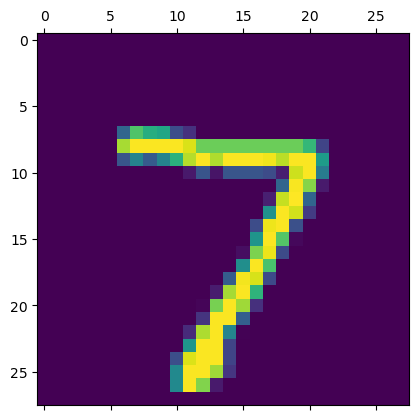

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0] # give prediction value for all number 0 to 9

313/313 [==============================] - 1s 3ms/step


array([1.3746528e-02, 1.6678905e-07, 6.9812931e-02, 9.3769288e-01,
       3.0189755e-03, 8.7943621e-02, 1.3008415e-06, 9.9973160e-01,
       8.0207735e-02, 6.1529428e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0]) #give index of max number

7

In [22]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

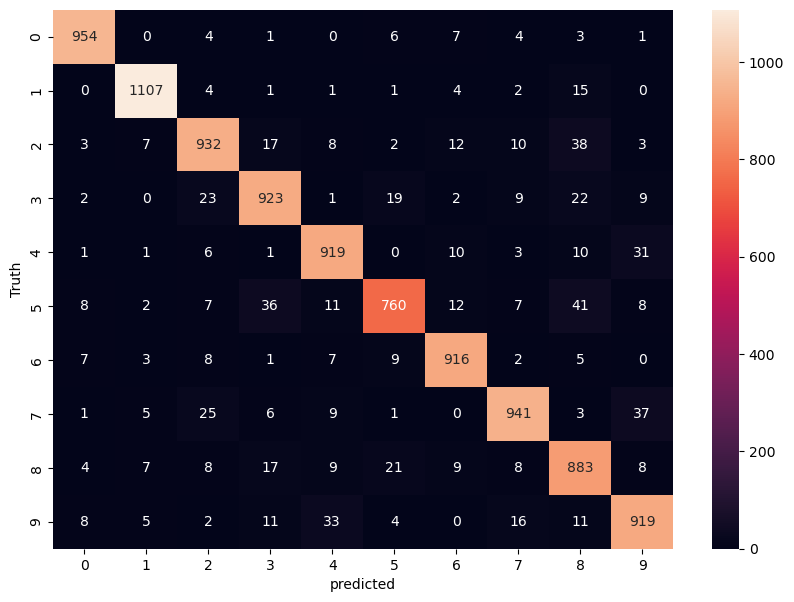

In [23]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [26]:
#Adding another layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
]) 

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4227 - accuracy: 0.8918
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2028 - accuracy: 0.9421
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1505 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1187 - accuracy: 0.9660
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0973 - accuracy: 0.9721


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1042 - accuracy: 0.9689


[0.10422340035438538, 0.9689000248908997]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

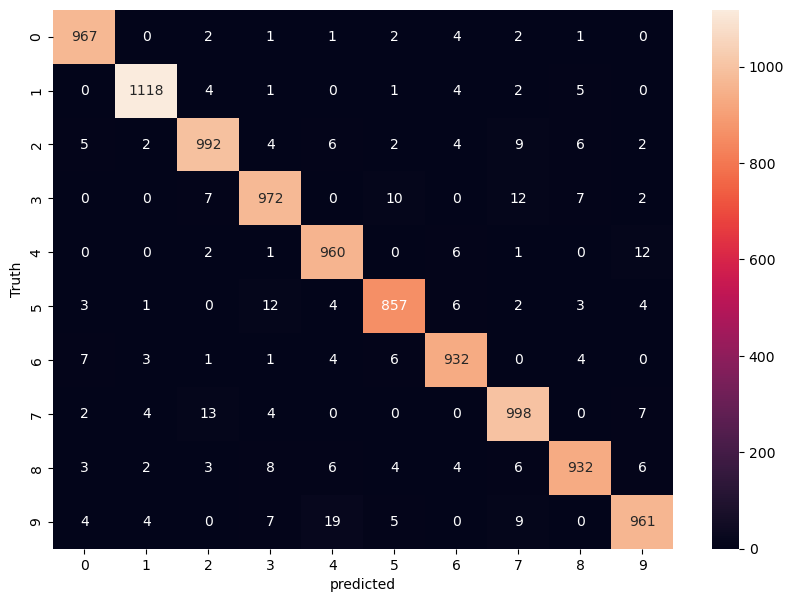

In [29]:
#confusion matrix

y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')